In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sms_df=pd.read_csv('smsspamcollection.tsv',sep='\t')

In [3]:
sms_df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
sms_df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [5]:
sms_df['label'].value_counts(sort=False)

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
sms_df[sms_df['label']=='ham']['label']

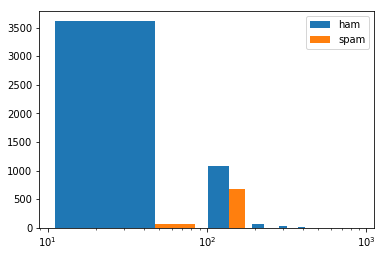

In [9]:
plt.xscale('log')
plt.hist(x=[sms_df[sms_df['label']=='ham']['length'],sms_df[sms_df['label']=='spam']['length']],label=['ham','spam'])

plt.legend()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   5.,  15.,  36.,
        107., 579.,   2.]),
 array([  1.        ,   1.5       ,   2.25      ,   3.375     ,
          5.0625    ,   7.59375   ,  11.390625  ,  17.0859375 ,
         25.62890625,  38.44335938,  57.66503906,  86.49755859,
        129.74633789, 194.61950684, 291.92926025]),
 <a list of 14 Patch objects>)

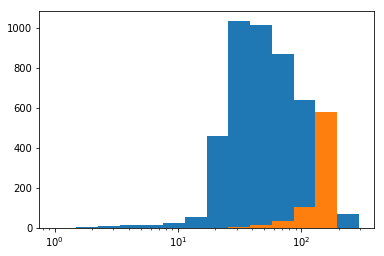

In [12]:
plt.xscale('log')
bins=1.5**np.arange(0,15)
plt.hist(x=sms_df[sms_df['label']=='ham']['length'],bins=bins)
plt.hist(x=sms_df[sms_df['label']=='spam']['length'],bins=bins)

In [14]:
X=sms_df[['length','punct']]
y=sms_df['label']

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
logistic_regression=LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_predict=logistic_regression.predict(X_test)

In [23]:
y_predict

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [24]:
from sklearn import metrics

In [27]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_predict),index=['ham','spam'],columns=['ham','spam'])

,ham,spam
ham,1547,46
spam,241,5


In [26]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

   micro avg       0.84      0.84      0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [28]:
print(metrics.accuracy_score(y_test,y_predict))

0.843936922240348
